# Applied Statistics Project

**Francesco Troja**

***

### Table of Contents
1. [Python Libraries](#Python_Libraries)
2. [Problem Statement](#problem_statement)
3. [Introduction](#Introduction)
4. [Importing the Dataset](#Importing_the_Dataset)
5. [Exploratory Data Analysis ](#eda)
    - [5.1 Data Overview](#data_overview)
    - [5.2 Data Cleaning](#data_cleaning)
    - [5.3 Summary Statistics](#summary_statistics)
    - [5.4 Data Distribution](#data_distribution)
6. [$t$-test: Introduction](#t_test)
   -  [6.1 Assumption Check: Independence of observation](#assumption)
   -  [6.2 Assumption Check: Normality of Data](#assumption_1)
   -  [6.3 Assumption Check: Homogeneity of Variance](#assumption_2)
7. [$t$-test: Independent $t$-test](#independent)
8. [Limitation in $t$-test analysis](#limitation_in_test_analysis)
   - [8.1 Type I and Type II Errors in Hypothesis Testing](#Type_I_and_Type_II_Errors_in_Hypothesis_Testing)



### 1. Python Libraries <a class="anchor" id="Python_Libraries"></a>

This notebook utilizes a selection of **Python libraries**, each chosen for its *specific functionalities* and *capabilities* to address the diverse needs of the project. These libraries were carefully selected to ensure the **successful execution** of the project, aligning with the project’s *objectives* and *technical requirements*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro, probplot, levene, ttest_ind

### 2. Problem Statement <a class="anchor" id="problem_statement"></a>

> In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups. Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:
>1. Download and save the dataset to your repository.
>2. Describe the data set in your notebook.
>3. Describe what a t-test is, how it works, and what the assumptions are.
>4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.
>5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.
>6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

### 3. Introduction <a class="anchor" id="Introduction"></a>

The **PlantGrowth dataset** originates from an experiment aimed at *evaluating the effects of different conditions on plant yields*, specifically *measuring the dried weight of plants*. The dataset comprises observations from three groups: a **control group** and **two treatment groups**, each containing *ten plants*. To ensure fairness and reduce variability, the experiment employed genetically similar seeds, which were randomly assigned to either a nutritionally enriched environment (*treatment groups*) or standard growing conditions (*control group*). This setup reflects a **completely randomized experimental design**. Following a set growing period, the plants were harvested, dried, and weighed, with their weights recorded in grams. The dataset offers a valuable resource for analyzing and comparing the impact of nutritional enhancements on plant growth, serving as a foundational tool for studying *treatment efficacy* in controlled agricultural experiments $^1$.

### 4. Importing the Dataset <a class="anchor" id="Importing_the_Dataset"></a>

The **PlantGrowth dataset** has been downloaded and imported into the repository from [Vincent Arel-Bundock's Rdatasets's](https://vincentarelbundock.github.io/Rdatasets/articles/data.html) Rdatasets page, which offers a curated collection of various datasets in CSV format.

To begin the project, the first step is to *import the dataset*. The most efficient Python library for importing and analyzing datasets is *pandas*. This library offers an array of tools for handling, manipulating, and analyzing data. In this case, the *dataset* is stored in a CSV file, and the most efficient way to work with such files is by utilizing the `read_csv()` function from the *pandas library*. This function allows for easy importation of CSV files into a **Pandas DataFrame**, a versatile structure that simplifies data exploration, manipulation, and analysis. To import the file, the *file path* is provided as an argument, which specifies the file's location on the system. The `read_csv()` function then reads the data from the specified file and loads it into a **DataFrame**, making it ready for further processing and analysis $^2$.

In [2]:
# read the csv file
df = pd.read_csv('PlantGrowth.csv')
print("Original DataFrame:")
df

Original DataFrame:


,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


Once the dataset is imported and displayed, it is apparent that the **PlantGrowth dataset** consists of a *small sample size of just 30 entries*. Typically, in pandas, the [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [`tail()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) functions are available to preview the first and last 5 rows of the dataset by default. However, given the small size of this dataset, it's not necessary to use these functions. A quick glance at the dataset structure reveals *three variables*: **rownames**, **weight**, and **group**.

### 5. Exploratory Data Analysis <a class="anchor" id="eda"></a>

**This section will focus on conducting Exploratory Data Analysis (EDA)**, a crucial initial step in the data analysis process. *EDA* helps us gain a **comprehensive understanding** of the dataset, uncovering *patterns* and *relationships* that can guide subsequent analysis and decision-making. By thoroughly examining the data, we can identify key trends, detect anomalies, and generate valuable insights. Additionally, this step is instrumental in determining the appropriate type of **hypothesis tests** to perform, ensuring that our statistical evaluations align with the characteristics of the data.

#### 5.1 Data Overview <a class="anchor" id="data_overview"></a>

We begin our **Exploratory Data Analysis** by examining the dataset's *structure* and *fundamental characteristics*. To achieve this, we will utilize **Pandas functions** such as [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), [`shape`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html), and [`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html). These tools provide **critical insights**, including an overview of the dataset's structure, the total number of entries and features, the data types of each column, and the count of unique values per column $^3$.

In [3]:
# def function to analyse dataset structure
def data_overview(data):
    print("Dataset Information:")
    data.info()
    print("\nDataset Shape:")
    print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}")
    print("\nUnique Values per Column:")
    print(data.nunique())

data_overview(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes

Dataset Shape:
Rows: 30, Columns: 3

Unique Values per Column:
rownames    30
weight      29
group        3
dtype: int64


Our dataset consists of **30 rows** and **3 columns**: *rownames*, *weight*, and *group*. Importantly, the dataset contains no missing values, meaning we can analyze it directly without needing to address gaps or impute data. The columns can be categorized into two types of variables:

- **Discrete/Continuous variables**: This includes *rownames* and *weight*.
- **Categorical variables**: This is represented by the *group* column.

The distinction between these variable types lies in how they are measured and used in analysis. **Continuous variables**, are *numeric* and allow for *arithmetic operations* such as addition or averaging. On the other hand, **categorical variables**, are *qualitative* and used to *categorize* or *label data points without implying any numerical relationship between categories* $^4$.

This distinct separation of variables plays a crucial role in guiding the selection of appropriate statistical methods and visualization techniques for effective analysis. 

#### 5.2 Data Cleaning <a class="anchor" id="data_cleaning"></a>

At a preliminary analysis, our dataset does not appear to contain any missing values. To confirm this observation, we can utilize the Pandas method [`isnull()`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html), which identifies missing values within the dataset.

In [4]:
# Summarizes missing values for each column
df.isnull().sum()

rownames    0
weight      0
group       0
dtype: int64

Let’s evaluate whether all the columns in our dataset are necessary for the analysis or if some can be excluded without affecting the results. Among the three columns, one stands out as non-essential: the *rownames* column. This column merely serves as an additional index, listing all the values in the dataset without providing any meaningful contribution to the analysis. Therefore, it can be safely removed. To accomplish this, we will use the [`drop()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) function to eliminate the *rownames* column from the dataset.

In [5]:
# Remove the `rownames` column
df.drop(columns=['rownames'], inplace=True)

# print the first 5 row
display(df.head())

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


#### 5.3 Summary Statistics <a class="anchor" id="summary_statistics"></a>

In this section, we will explore the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) function, a key tool for Exploratory Data Analysis and statistical assessment. This function plays a crucial role in quickly summarizing the key attributes of a dataset, serving as an initial step to identify patterns and potential areas for deeper investigation. The `describe` function generates a comprehensive set of **summary statistics** for numerical columns, including the **mean**, **standard deviation**, **minimum**, **maximum**, and **quartiles** (25th, 50th, and 75th percentiles). These metrics provide valuable insights into the central tendency, variability, and overall distribution of the data. By examining these summaries, analysts can quickly detect trends, anomalies, or inconsistencies that may warrant further analysis, making the describe function an indispensable tool in the early stages of data exploration $^5$.

In [6]:
print("Summary statistics of the Continuous Variable:")
df.describe()

Summary statistics of the Continuous Variable:


,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The first inconsistency becomes evident when we revisit the introduction of the *PlantGrowth* dataset, which was designed to evaluate the effects on plant yields by measuring plant weights. The dataset is categorized into three distinct groups, each representing different experimental conditions. However, the summary statistics provided above is related to the entire plant population without accounting for the group divisions. To better understand the data, let us split the dataset into its three groups and generate separate statistical summaries for each. This approach will allow us to examine the differences between groups more accurately.

In [7]:
# create subsets of groups
ctrl = df[df['group'] == 'ctrl']
trt1 = df[df['group'] == 'trt1']
trt2 = df[df['group'] == 'trt2']

In [8]:
# Combine the groups into a dictionary for easier looping
groups = {'Control': ctrl, 'Treatment 1': trt1, 'Treatment 2': trt2}

# Loop through the groups and print the summary statistics
for key, value  in groups.items():
    print(f"Summary statistics for {key}:\n")
    display(value.describe())

Summary statistics for Control:



,weight
count,10.000000
mean,5.032000
std,0.583091
min,4.170000
25%,4.550000
50%,5.155000
75%,5.292500
max,6.110000


Summary statistics for Treatment 1:



,weight
count,10.000000
mean,4.661000
std,0.793676
min,3.590000
25%,4.207500
50%,4.550000
75%,4.870000
max,6.030000


Summary statistics for Treatment 2:



,weight
count,10.000000
mean,5.526000
std,0.442573
min,4.920000
25%,5.267500
50%,5.435000
75%,5.735000
max,6.310000


The analysis reveals that the **control group** has a *mean* weight of **5.03 grams**, **Treatment 1** has a *mean* weight of **4.66 grams**, and **Treatment 2** has a *mean* weight of **5.53 grams**. These results suggest that Treatment 2 may have a more significant positive effect on plant growth compared to both the control group and Treatment 1. Furthermore, Treatment 1 exhibits greater variability, with a higher standard deviation, indicating a wider spread in the weight data. The *minimum weight* observed in Treatment 1 is **3.59 grams**, which is notably lower than the minimums in the other two groups. This low value could be indicative of outliers or plants that responded poorly to the treatment.

#### 5.4 Data Distribution <a class="anchor" id="data_distribution"></a>

Having gained a comprehensive understanding of the dataset, it's now time to move forward and examine its distribution. Is the data approximately normally distributed, or does it exhibit skewness or kurtosis? Additionally, we should check for any potential outliers that might significantly impact the analysis. Let's begin with a basic visualization: the **histogram**. This is particularly well-suited for continuous data because it allows us to observe the distribution of data points across different intervals or bins. The visual representation provided by histograms enables us to discern the overall shape of the distribution, revealing whether it is symmetric, skewed, or exhibits multiple peaks (modes). One of the primary advantages of using histograms is their ability to facilitate a quick visual assessment of normality. By simply observing the shape of the histogram, we can quickly gauge if the data approximates a normal distribution or if there are significant deviations, such as skewness (asymmetry) or kurtosis (peakedness) $^6$. 

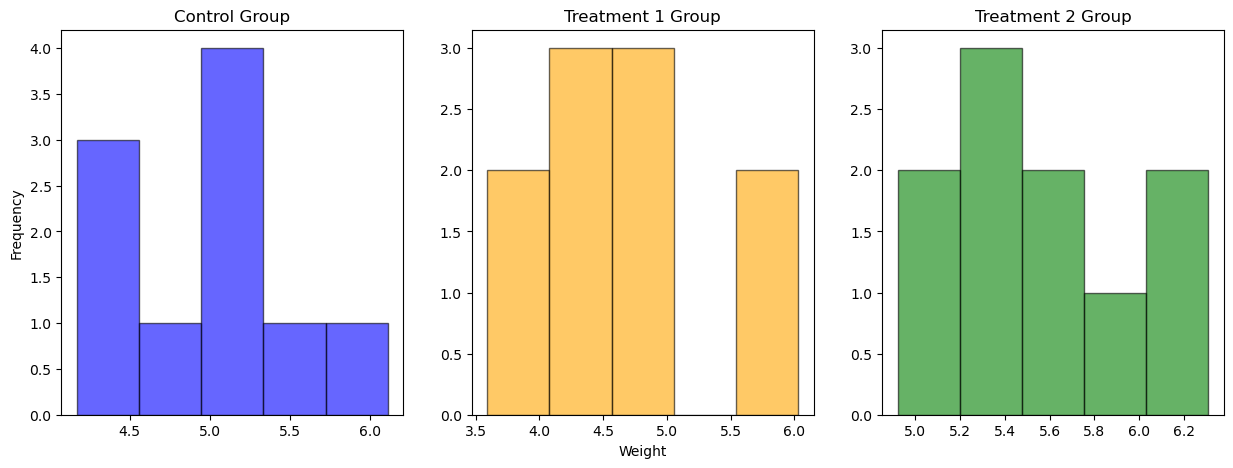

In [9]:
# create figure and axis
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot a histogram for each group
ax[0].hist(ctrl['weight'], bins=5, color='b', alpha=0.6, edgecolor='black')
ax[1].hist(trt1['weight'], bins=5, color='orange', alpha=0.6, edgecolor='black')
ax[2].hist(trt2['weight'], bins=5, color='g', alpha=0.6, edgecolor='black')

# Add titles and labels
ax[0].set_title('Control Group')
ax[1].set_title('Treatment 1 Group')
ax[2].set_title('Treatment 2 Group')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('Weight')
plt.show()


Before diving into the analysis of the histogram, let's consider an alternative approach to enhance our understanding. One effective method is to overlay the three histograms on top of each other. his allows us to visually compare their distributions, making it easier to identify patterns, differences, and relationships between the three categories.

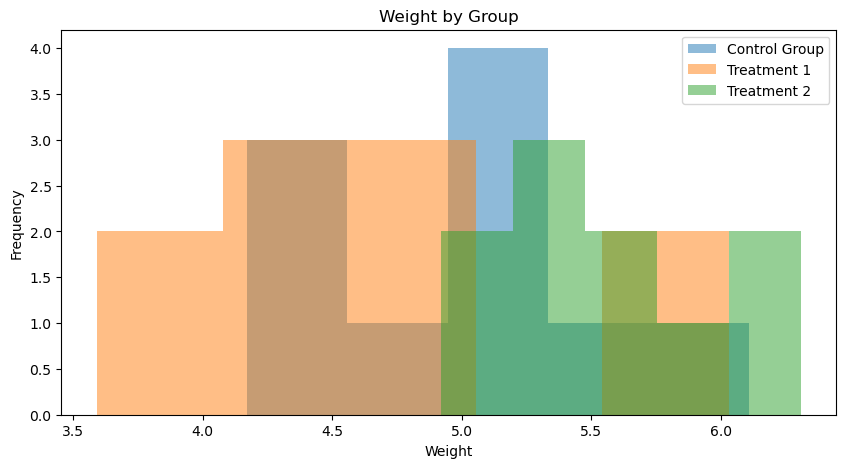

In [10]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of control group.
ax.hist(ctrl['weight'], bins=5, alpha=0.5, label='Control Group')

# Histogram of treatment 1 group.
ax.hist(trt1['weight'], bins=5, alpha=0.5, label='Treatment 1')

# Histogram of treatment 2 group.
ax.hist(trt2['weight'], bins=5, alpha=0.5, label='Treatment 2')

# Add a title and labels.
ax.set_title('Weight by Group')
ax.set_xlabel('Weight')
ax.set_ylabel('Frequency')

# Add a legend.
ax.legend()
plt.show()

The histogram allows us to address key questions about the data, such as identifying the central tendency, understanding the spread of the weights, and analyzing the overall shape of the distribution $^7$. From the histogram, we observe that the control group exhibits a strong central tendency, with most values concentrated between 5 and 5.3. Treatment 1 shows a slightly higher degree of variability, with observations ranging from as low as 3.5 to as high as 6. In contrast, Treatment 2 has the smallest deviation, with values primarily falling between 5 and 6.2. All three groups appear to follow a roughly normal distribution, although the control group is slightly left-skewed. There are no significant extreme outliers in the data.

Another effective method for visualizing data distribution is by creating a **boxplot**. This type of plot not only summarizes the central tendency and variability of the dataset but also highlights the presence of outliers more effectively, offering a clear representation of the data's spread and any potential anomalies $^8$.

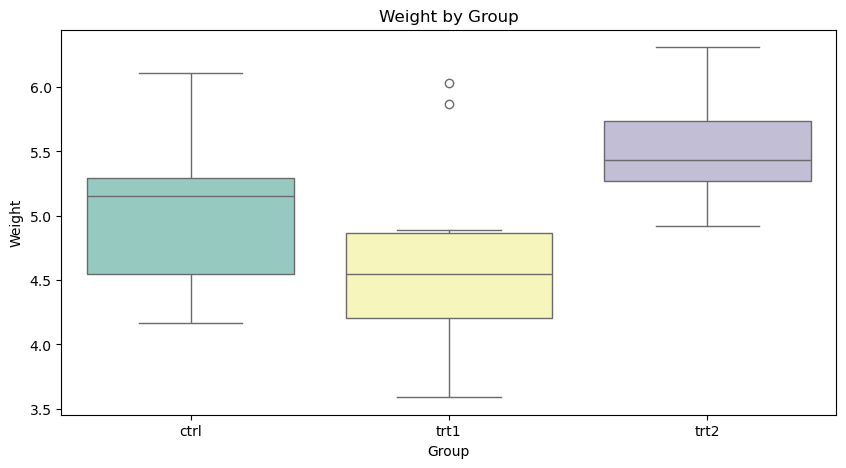

In [11]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
# create boxplot
ax = sns.boxplot(x='group', y='weight', data=df, palette='Set3', hue='group')
ax.set_title('Weight by Group')
ax.set_xlabel('Group')
ax.set_ylabel('Weight')
plt.show()

The boxplot reveals notable insights about plant growth across the three groups. Among these, the "**trt2**" group stands out as the most effective treatment, with the highest median plant growth and the least variability. This indicates that plants in this group not only grew the most on average but also exhibited consistent growth patterns. In contrast, the "**trt1**" group showed the lowest median growth and minimal variability, suggesting that this treatment is consistently less effective across plants. Interestingly, the "**trt1**" group also includes two outliers, highlighting a need for further investigation. These anomalies raise questions about potential factors influencing growth outcomes and whether their inclusion might skew the overall statistical analysis.

To further investigate the potential impact of the outliers identified in the "**trt1**" group from the boxplot, a **stripplot** will be employed to assess whether these points should be removed or retained in the analysis. The stripplot provides a more detailed view of the data distribution, allowing for a clearer understanding of how these outliers relate to the rest of the data $^9$.

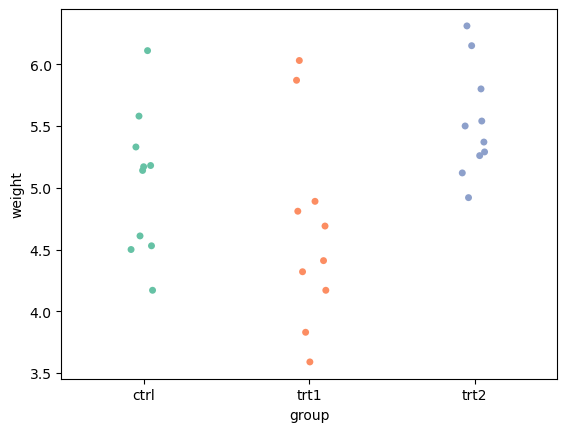

In [12]:
# cfreate a stripplot
sns.stripplot(data=df, x='group', y='weight', jitter=True, palette='Set2', hue='group')
plt.show()

As seen from the stripplot, the outliers in the "**trt1**" group (**5.87** and **6.03**) are positioned on the higher end of the weight distribution but are not isolated from the rest of the data. These values, while higher than the majority of the "**trt1**" group, fall within the broader range observed in the other treatment groups, where similar or higher values are present. This suggests that these outliers in "**trt1**" are not extreme anomalies but rather reflect natural variability, consistent with the distribution in the other groups. Given this context, the outliers are retained in the analysis as they do not significantly distort the overall data pattern or statistical measures.

The final step in the exploratory data analysis (EDA) before proceeding with the $t$-test involves examining the **skewness** and **kurtosis** of the three groups. These statistical measures are essential for understanding the distribution characteristics of the data. **Skewness** assesses the asymmetry of the distribution, indicating whether the data leans more toward one side of the mean. A skewness value of 0 suggests perfect symmetry, while a positive skewness indicates a distribution with a longer tail on the right side, meaning that more values are concentrated on the left. Conversely, a negative skewness implies that the distribution has a longer tail on the left, with more values clustered on the right. **Kurtosis**, on the other hand, measures the "*tailedness*" of the distribution, providing insights into the presence of extreme values or outliers. A distribution with **positive kurtosis** (*leptokurtic*) has a sharper peak and heavier tails compared to a normal distribution, suggesting a higher likelihood of extreme values. **Negative kurtosis** (*platykurtic*) indicates a flatter peak and lighter tails, implying fewer extreme values. A kurtosis value **close to zero** (*mesokurtic*) suggests that the distribution's shape is similar to that of a normal distribution $^10$.

In [13]:
# check for skewness and kurtosis
one = ctrl['weight'].skew(), ctrl['weight'].kurt()
two = trt1['weight'].skew(), trt1['weight'].kurt()
three = trt2['weight'].skew(), trt2['weight'].kurt()

print(f"Skewness and Kurtosis for Control Group: {one}")
print(f"Skewness and Kurtosis for Treatment 1 Group: {two}")
print(f"Skewness and Kurtosis for Treatment 2 Group: {three}")

Skewness and Kurtosis for Control Group: (0.32097497503746636, -0.2291251231859004)
Skewness and Kurtosis for Treatment 1 Group: (0.6589693755532032, -0.20279495295056016)
Skewness and Kurtosis for Treatment 2 Group: (0.6732157155170325, -0.32420118768580775)


The skewness and kurtosis values across all three groups indicate relatively symmetric distributions with no extreme deviations. All groups exhibit slight positive skewness, meaning there are some larger weights, particularly in the treatment groups. The control group is closest to symmetry, while treatment groups show moderately heavier right tails, potentially reflecting the effectiveness of treatments. The kurtosis values are slightly negative for all groups, indicating relatively flat peaks and fewer extreme values, confirming that the datasets do not have significant outliers or heavy tails.

### 6. $t$-test: Introduction <a class="anchor" id="t_test"></a>

An introduction to the **$t$-test** was previously provided during the discussion of Task 3. Let's now delve into the key points outlined in the task document. The **$t$-test** was first introduced by *William Sealy Gosset* in his seminal 1908 paper, "*The Probable Error of a Mean*". Gosset published this work under the pseudonym "**Student**" due to his employment at the Guinness brewery, which enforced a strict policy prohibiting employees from publishing under their real names. This policy aimed to safeguard the company’s proprietary interests while allowing its researchers to contribute to academic and industrial knowledge **$^{11}$**.

The **$t$-test** is a widely used *statistical technique* designed to determine whether there is a *significant difference* between the *means of two groups*. It evaluates whether the observed differences in group means are likely due to chance or reflect a true underlying difference in the population. Unlike other statistical methods that require large sample sizes to ensure reliable results, the **$t$-test** is particularly *effective* for **smaller sample sizes**. The **$t$-test** works by *comparing* the *sample means* while accounting for variability within the groups and the sample size. By calculating the **$t$-statistic**, which measures the size of the difference relative to the variation in the sample data, it is possible to determine the probability (**$p$-value**) of observing such a difference under the null hypothesis, which assumes no actual difference exists. The **$t$-test** is a versatile statistical tool, with *three main variations* designed to address different situations, depending on the assumptions made about the data's distribution. Each version of the **$t$-test** is tailored to *handle specific conditions*, ensuring appropriate analysis across various datasets. The **independent $t$-test** is used to *compare the means of two separate groups* to determine if there is a significant difference between them. The **paired $t$-test** evaluates the *mean difference within the same group under two distinct conditions*, often employed in before-and-after studies or matched-pair designs. Lastly, the **one-sample $t$-test** examines whether the *mean of a single sample significantly deviates from a known population mean*. To conclude, as previously mentioned, there are two key considerations when using the **$t$-test**, which are consistent across the three types of **$t$-tests**. The first of these factors refers to the **null hypothesis**, which plays a fundamental role in the testing process. Alongside this, it is important to carefully examine the underlying **assumptions** that the $t$-test relies on. The **null hypothesis** generally proposes that *there is no significant difference between the groups or observed values*. In the case of the one-sample $t$-test, the null hypothesis suggests that the sample mean equals the population mean. For the independent and paired $t$-tests, the null hypothesis posits that the means of the two groups being compared are equal. In addition to the null hypothesis, certain **assumptions must be met** for the $t$-test to provide valid results. One key assumption is the **normality of the data**, meaning that *each group should follow a normal distribution*, or at least *approximately so*. Another assumption concerns the **independence of observations**, particularly in the independent $t$-test, where the two samples must be independent of each other. For the paired $t$-test, the observations should be paired meaningfully, such as with before-and-after measurements on the same subjects. Furthermore, for the independent and paired $t$-tests, the assumption of **equal variances** (*homogeneity of variance*) between the groups is important, though alternative approaches exist when this assumption is violated. Meeting these assumptions ensures the reliability of the $t$-test results and the validity of the conclusions drawn. It is crucial to verify that all assumptions are satisfied before performing the test to avoid misleading or invalid interpretations **$^{12}$**.

Before diving into the assumption checks and performing the **$t$-test**, it's crucial to first determine the type of test that will be applied to our dataset. Given that we are working with data from different experiments, we can treat the three groups as independent of one another. As a result, the appropriate test for this scenario is the **independent $t$-test**.

#### 6.1 Assumption Check: Independence of observation  <a class="anchor" id="assumption"></a>

Let's begin with the most straightforward assumption: the **independence of observations**. Given the dataset's origin and the **random assignment** of seeds to each group, the three groups (**control**, **experiment 1**, and **experiment 2**) are independent of each other. This is because **plants in the treatment groups are not paired** with plants in the control group, and vice versa, ensuring that no plant is linked or dependent on another within or across groups. Consequently, the independence assumption holds as there are no inherent relationships between observations within the groups.

#### 6.2 Assumption Check: Normality of Data  <a class="anchor" id="assumption_1"></a>

Let's now turn our attention to the second assumption, which concerns the **normality of the data**. During the EDA, we took initial steps that provided insight into the likelihood that the data follows a **normal distribution**. These actions, such as examining summary statistics and visualizing the distribution, suggested that the *data might adhere to a normal pattern*. However, for further validation, we can conduct more *formal tests to assess normality*. These tests, such as the **Shapiro-Wilk test**, **Anderson-Darling Test**, **Kolmogorov-Smirnov test** etc., *provide statistical evidence to confirm or refute the assumption of normality*. Additionally, we can use *graphical method* like **Q-Q plot** to visually inspect how well the data fits a normal distribution. If the results of these tests and visualizations indicate a significant deviation from normality, we may need to consider transforming the data or using non-parametric methods for analysis **$^{13}$**.

The **Shapiro-Wilk Test** has been chosen for our analysis because it is uniquely designed to perform well with *small datasets*, making it particularly suitable for our case. Unlike other normality tests, the **Shapiro-Wilk Test** is highly reliable and accurate in *assessing whether data conforms to a normal distribution*, especially when working with limited data points. For instance, the **Kolmogorov-Smirnov test**, while versatile, tends to *struggle with small datasets* and is *less sensitive* to subtle deviations in the tails of the distribution. Similarly, the **Anderson-Darling test**, although more focused on tail behavior, is *better suited for larger datasets* where its strengths can be fully utilized. As a result, *employing these tests on a small sample* like ours would likely *yield less accurate or less meaningful results*. To implement the Shapiro-Wilk Test, we will use the `shapiro` function from the scipy library. This function returns a $p$-value, which we will interpret using a standard significance level of $0.05$. If the $p$-value is below this threshold, we will reject the null hypothesis, concluding that the sample does not follow a normal distribution **$^{14}$**.

In [14]:
# create dictionary of subsets
subsets = {"Control": ctrl, "Treatment 1": trt1, "Treatment 2": trt2}

# loop through the subsets and perform the Shapiro-Wilk test
for subset_name, subset_data in subsets.items():
    # Removing the 'group' column
    weight_only = subset_data.drop(columns=['group'])
    for column in weight_only.columns:
        # Perform the Shapiro-Wilk test
        stat, p = shapiro(weight_only[column])
        print(f"Shapiro-Wilk Test for {subset_name}:\np-value = {p}")
        # Set the significance level
        alpha = 0.05
        if p > alpha:
            print(f"{column} in {subset_name} looks Gaussian (fail to reject H0)\n")
        else:
            print(f"{column} in {subset_name} does not look Gaussian (reject H0)\n")

Shapiro-Wilk Test for Control:
p-value = 0.7474744915962219
weight in Control looks Gaussian (fail to reject H0)

Shapiro-Wilk Test for Treatment 1:
p-value = 0.451945960521698
weight in Treatment 1 looks Gaussian (fail to reject H0)

Shapiro-Wilk Test for Treatment 2:
p-value = 0.5642533898353577
weight in Treatment 2 looks Gaussian (fail to reject H0)



Based on the **Shapiro-Wilk test** results, all three groups have *$p$-values greater than the chosen significance level*. This indicates that we **fail to reject the null hypothesis**, suggesting that the **data** for all three groups are *consistent with a normal distribution*.

We can now proceed with the final method to demonstrate that our samples follow a normal distribution, allowing us to confirm that they meet the assumptions of the t-test. To achieve this, we will utilize a **Q-Q plot**. This method is particularly useful because it *visually compares* the distribution of our sample data against a *theoretical normal distribution*. If the points on the plot approximately align along a straight line, this suggests that the data follows a normal distribution, providing further evidence that the t-test assumption is valid.

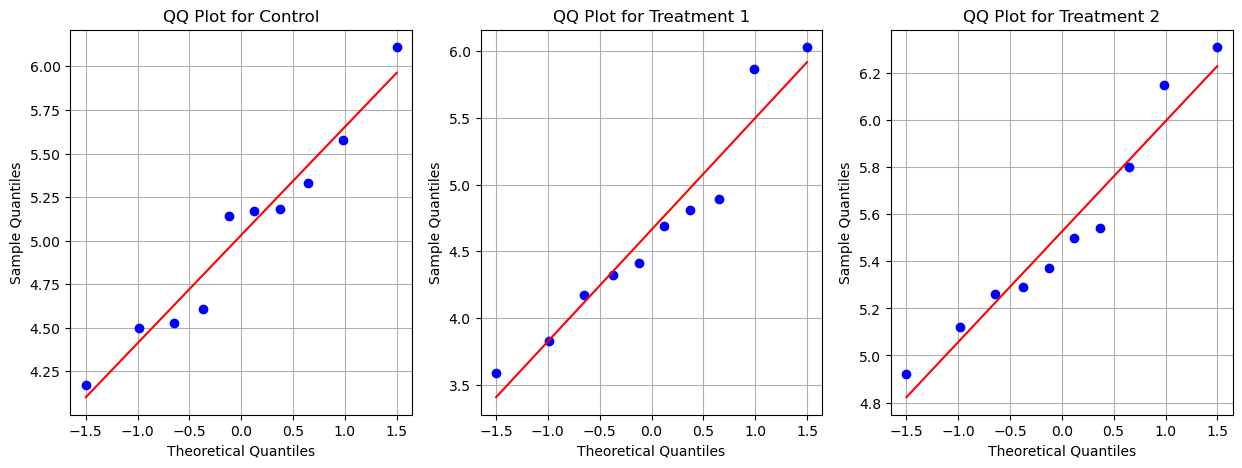

In [15]:
subsets = {"Control": ctrl, "Treatment 1": trt1, "Treatment 2": trt2}

# Create a single figure with 1 column and 3 rows for the QQ plots
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# Loop through the subsets and create a QQ plot for each group
for i, (group_name, subset) in enumerate(subsets.items()):
    weight_only = subset.drop(columns=['group'])
    # Create QQ plot for each column in the group
    for column in weight_only.columns:
        ax = axes[i]
        probplot(subset[column], dist="norm", plot=ax)
        ax.set_title(f"QQ Plot for {group_name}")
        ax.set_xlabel("Theoretical Quantiles")
        ax.set_ylabel("Sample Quantiles")
        ax.grid(True)
plt.show()

The data for all three groups — *Control*, *Treatment 1*, and *Treatment 2* — *align closely with the red reference line*. This alignment supports the validity of the normality assumptionThis indicates that the assumption of normality is valid for conducting parametric tests like the $t$-test.

#### 6.3 Assumption Check: Homogeneity of Variance  <a class="anchor" id="assumption_2"></a>


The final assumption is the **Homogeneity of Variance** test, which evaluates whether the *variance across multiple groups is consistent*. To verify this, we will perform **Levene's Test**, a widely used method to assess variance equality among groups. **Levene's Test** specifically examines whether the null hypothesis, that the variances across the groups are equal, can be supported. Conversely, the alternative hypothesis posits that the variances differ, indicating that the groups are drawn from populations with unequal variances **$^{15}$**.

In [16]:
# Levene's test
stat, p_value = levene(ctrl['weight'], trt1['weight'], trt2['weight'])
print(f"Levene's Test: p-value = {p_value}")
if p_value > 0.05:
    print("The variances appear to be equal (homogeneity of variance assumption satisfied).\n")
else:
    print("The variances do not appear to be equal (homogeneity of variance assumption violated).\n")

Levene's Test: p-value = 0.3412266241254737
The variances appear to be equal (homogeneity of variance assumption satisfied).



In this case, we **fail to reject the null hypothesis**, which suggests that there is *no significant difference in the variance between the three groups*. Therefore, we conclude that the groups exhibit homogeneity of variance. With this assumption validated, we can now proceed to perform the independent $t$-test.

### 7. $t$-test: Independent $t$-test  <a class="anchor" id="independent"></a>

A independent $t$-test requires a **categorical independent variable** (ctrl, trt1 and trt2 in our case) and a **continuous dependent variable** (the groups' weights) that, as outlined in the previous section, must be approximately normally distributed. The assumption of normality is crucial for ensuring the validity of the test results, particularly for smaller sample sizes. The formula for calculating the $t$-value in an independent $t$-test is as follows:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

where:
- $\bar{X}_1$ and $\bar{X}_2$ are the sample means of the two groups.
- $n_1$ and $n_2$ are the sample sizes of the respective groups.
- ${s_1^2}$ and ${s_2^2}$ are the sample variances of the two groups.

This formula combines the difference between the **two group means** with a measure of the variability within each group, adjusted by their sample sizes, to compute the test statistic. By comparing this $t$-statistic to a critical value (or using a p-value), we can determine whether the observed difference in means is statistically significant or likely due to random chance $^{16}$.

We will now conduct a $t$-test to evaluate whether there is sufficient evidence to reject the null hypothesis for the two variables, **trt1** and **trt2**. This statistical test determines if the means of the two independent samples differ significantly. In Python, we can use the `ttest_ind` function from the SciPy library to perform the test. This function requires two arrays of the same shape as input and outputs the $t$-statistic and the p-value, which are essential for interpreting the test results $^{17}$.

In [17]:
# perform the independent t-test
stat, p = ttest_ind(trt1['weight'], trt2['weight'])
# set the significance level
alpha = 0.05

if p > alpha:
    print(f"t-statistics is {stat}\np-value is {p}\nFail to reject H0: The means are equal.")
else:
    print(f"t-statistics is {stat}\np-value is {p}\nReject H0: The means are not equal.")

t-statistics is -3.0100985421243616
p-value is 0.0075184261182198574
Reject H0: The means are not equal.


After conducting an independent $t$-test to compare the means of **trt1** and **trt2**, the analysis resulted in a $t$-statistic of -3.0100985421243616 and a p-value of 0.0075184261182198574. As with standard hypothesis testing, the p-value is compared against the commonly used significance level of 0.05. Since the p-value does not exceed this threshold, there is sufficient evidence to reject the null hypothesis. Consequently, we conclude that the data provide a statistically significant difference between the means of the two groups.

### 8. Limitation in $t$-test analysis <a class="anchor" id="limitation_in_test_analysis"></a>

Before we explore the ANOVA test, it's important to address the **limitations of the $t$-test** when applied to datasets with *more than two variables*. While the $t$-test is effective for comparing the means of two groups, it becomes *less reliable* and may *produce misleading results* when comparing multiple groups or variables. As the number of groups increases, so does the **risk of Type I errors** — incorrectly rejecting the null hypothesis — making the $t$-test inadequate for situations involving several comparisons $^{18}$. 

In our dataset, comparing only `trt1` and `trt2` provides specific insights but leaves the control group (`ctrl`) unaccounted for, which introduces several challenges. By comparing just `trt1` and `trt2`, we overlook potential relationships between the control group and the treatment groups, which can lead to a skewed or incomplete analysis. Additionally, conducting multiple $t$-tests without adjusting for multiple comparisons increases the chance of falsely rejecting at least one null hypothesis. For instance, if we compare `ctrl` vs `trt1`, `ctrl` vs `trt2`, and `trt1` vs `trt2`, the likelihood of making at least one Type I error increases with each additional test. 
This issue highlights the importance of understanding Type I and Type II errors in hypothesis testing, as they directly influence the validity of statistical conclusions. Thoroughly assessing their implications is vital to ensure the accuracy and integrity of the analysis before advancing further.


 #### 8.1 Type I and Type II Errors in Hypothesis Testing <a class="anchor" id="Type_I_and_Type_II_Errors_in_Hypothesis_Testing"></a>

 To address these issues, let's begin by performing a $t$-test for all possible pairwise comparisons between the three variables: `ctrl`, `trt1`, and `trt2`.

In hypothesis testing, researchers aim to determine whether there is *enough evidence* to **reject the null hypothesis**, which states that no relationship exists between the variables being tested. However, due to the inherent uncertainty in inferential statistics, errors can occur:

- **Type I error** (*false positive*) arises when the *null hypothesis is rejected despite being true*. This error becomes more likely in situations involving multiple comparisons, as each additional test adds to the cumulative risk of incorrectly rejecting the null hypothesis.
- **Type II error** (*false negative*) occurs when the *null hypothesis is not rejected despite it being false*, meaning a real effect or difference is overlooked. The probability of a Type II error is denoted as $\beta$, and the power of a test (1 − $\beta$) measures its ability to detect a true effect.
  
Both types of errors are critical to consider in statistical analyses, as they directly impact the reliability of conclusions. When performing multiple $t$-tests for pairwise comparisons, the increased risk of Type I errors is especially concerning, as it could lead to invalid conclusions about group differences $^{19}$.

To investigate these risks, we will conduct independent $t$-tests for all possible pairwise comparisons between the three groups: `ctrl`, `trt1`, and `trt2`. With three groups, there are three distinct pairwise tests: `ctrl` vs `trt1`, `ctrl` vs `trt2`, and `trt1` vs `trt2`. The results of each test will help us evaluate whether the increased number of comparisons significantly impacts the likelihood of Type I errors.

In [18]:
# number of way to select 2 samples from n.
n = 3
# use combinations formula to calculate the number of ways to select 2 samples from n
combinations = math.comb(n, 2)

print(f"Number of ways to select 2 samples from {n} is {combinations}")

Number of ways to select 2 samples from 3 is 3


We have confirmed that there are three distinct methods for conducting the $t$-test, allowing us to proceed with independent $t$-tests for each pair of groups. The aim is to assess whether conducting these three pairwise tests increases the likelihood of a Type I error (false positives), especially when each individual test is conducted at a significance level of $\alpha$=0.05. 

In [39]:
# significance level
alpha = 0.05
# Perform pairwise t-tests
results = {}
pairs = [('ctrl', 'trt1'), ('ctrl', 'trt2'), ('trt1', 'trt2')]

for pair in pairs:
    group1 = df[df['group'] == pair[0]]['weight']
    group2 = df[df['group'] == pair[1]]['weight']

    t_stat, p_value = ttest_ind(group1, group2)
    
    results[pair] = {'t-statistic': t_stat, 'p-value': p_value}
    
    if p_value > alpha:
        results[pair]['result'] = 'Fail to reject H0: The means are equal'
    else:
        results[pair]['result'] = 'Reject H0: The means are not equal'

# Display the results
for pair, result in results.items():
    print(f"{pair[0]} vs {pair[1]}:")
    print(f"t-statistic: {result['t-statistic']}")
    print(f"p-value: {result['p-value']}")
    print(result['result'])
    print("-" * 46)

ctrl vs trt1:
t-statistic: 1.1912603818487009
p-value: 0.2490231659730067
Fail to reject H0: The means are equal
----------------------------------------------
ctrl vs trt2:
t-statistic: -2.1340204531240654
p-value: 0.04685138491157358
Reject H0: The means are not equal
----------------------------------------------
trt1 vs trt2:
t-statistic: -3.0100985421243616
p-value: 0.0075184261182198574
Reject H0: The means are not equal
----------------------------------------------


In the analysis above, significant differences were observed between `ctrl` vs `trt2` and `trt1` vs `trt2`, as indicated by the p-values being below the significance threshold of 0.05. However, for the comparison between `ctrl` and `trt1`, the **p-value** of 0.249 was *greater than the significance level*, leading us to **fail in rejecting the null hypothesis**. This suggests that there is *insufficient evidence to conclude a significant difference between the means of the control group* (ctrl) *and treatment 1* (trt1).

While these results provide preliminary insights, they must be interpreted cautiously due to the issue of **multiple comparisons**. Each statistical test carries an individual risk of making a Type I error (false positive) at the set significance level, typically 0.05. However, as the number of tests increases, the overall probability of encountering at least one false positive result rises. This cumulative risk, known as the **Family-Wise Error Rate** (FWER), represents the likelihood of making one or more Type I errors across all tests. The inflation of the Type I error rate when conducting multiple tests can be quantified using the formula:

$$\text{FWER} = 1 - (1-\alpha)^k$$

where:

- $\alpha$ is the significance level for each individual test.
- $k$ is the total number of tests conducted $^{20}$.

In [42]:
# Significance level
alpha = 0.05
# Number of tests
n_tests = [1, 2, 3]

# Loop through the test counts and calculate FWER
for n in n_tests:
    fwer = 1 - (1 - alpha)**n
    print(f"FWER for {n} tests: {fwer:.3f}")

FWER for 1 tests: 0.050
FWER for 2 tests: 0.098
FWER for 3 tests: 0.143


For instance, when performing two t-tests at a significance level of 0.05, the FWER increases from 5% to approximately 10%. With three tests, the FWER rises to around 14.3%. This highlights a key challenge: the more tests we conduct, the greater the likelihood of obtaining statistically significant results purely by chance. Such inflated error rates can lead to misleading conclusions, making it difficult to separate true effects from random variation.

In this context, the Bonferroni correction offers a widely-used solution to control the FWER. By dividing the desired overall significance level (e.g., 0.05) by the number of tests performed, the Bonferroni correction adjusts the significance threshold for each individual test, ensuring that the overall error rate remains within acceptable limits. Applying this adjustment will help determine whether the observed significant differences between ctrl vs trt2 and trt1 vs trt2 hold under stricter criteria $^{21}$.

In [21]:
# Bonferroni correction
alpha = 0.05
n_tests = 3
# Calculate the Bonferroni adjusted alpha
bonferroni_alpha = alpha / n_tests

print(f"Bonferroni adjusted alpha: {bonferroni_alpha:.4f}")

Bonferroni adjusted alpha: 0.0167


We will revisit the comparison in the context of the pairwise t-test to determine the adjusted significance level (adjusted_alpha). This is calculated by dividing the original alpha (0.05) by the number of tests (n_tests). The adjusted significance level is then used as a threshold to evaluate the p-values, guiding the decision to reject or fail to reject the null hypothesis. Rather than adjusting the p-values themselves, we will directly compare the original p-value to the adjusted significance level. If the p-value is smaller than the adjusted threshold, we reject the null hypothesis. This approach helps control for the increased risk of Type I errors when conducting multiple tests.

In [ ]:
# Perform and reassess the pairwise t-tests with the Bonferroni correction
results = {}
pairs = [('ctrl', 'trt1'), ('ctrl', 'trt2'), ('trt1', 'trt2')]

# Set the desired alpha level
alpha = 0.05

# length of the pairs
n_tests = len(pairs)

# Adjusted significance level using the Bonferroni correction
adjusted_alpha = alpha / n_tests

# Loop through the pairs and perform the t-tests
for pair in pairs:
    group1 = df[df['group'] == pair[0]]['weight']
    group2 = df[df['group'] == pair[1]]['weight']
    
    # Perform the independent t-test
    t_stat, p_value = ttest_ind(group1, group2)
    
    # Evaluate the null hypothesis with the adjusted significance level
    if p_value > adjusted_alpha:
        result = 'Fail to reject H0: The means are equal'

    else:
        result = 'Reject H0: The means are not equal'

    # Store the results for each pair
    results[pair] = {
        't-statistic': t_stat,
        'original p-value': p_value,
        'adjusted significance level': adjusted_alpha,
        'result': result
    }

# Display the results
print("Pairwise Comparisons with Bonferroni Correction:\n")
for pair, result in results.items():
    print(f"{pair[0]} vs {pair[1]}:")
    print(f"t-statistic: {result['t-statistic']}")
    print(f"Original p-value: {result['original p-value']}")
    print(f"Adjusted significance level: {result['adjusted significance level']:.4f}")
    print(result['result'])
    print("-" * 46)


Pairwise Comparisons with Bonferroni Correction:

ctrl vs trt1:
t-statistic: 1.1912603818487009
Original p-value: 0.2490231659730067
Adjusted significance level: 0.0167
Fail to reject H0: The means are equal
----------------------------------------------
ctrl vs trt2:
t-statistic: -2.1340204531240654
Original p-value: 0.04685138491157358
Adjusted significance level: 0.0167
Fail to reject H0: The means are equal
----------------------------------------------
trt1 vs trt2:
t-statistic: -3.0100985421243616
Original p-value: 0.0075184261182198574
Adjusted significance level: 0.0167
Reject H0: The means are not equal
----------------------------------------------


After applying the Bonferroni correction to adjust the significance level for the pairwise comparisons, we can observe that the results remain largely unchanged, highlighting some limitations of this adjustment in our case. The original p-values for the comparisons between ctrl vs trt1 and ctrl vs trt2 were 0.2490 and 0.0469, respectively. After applying the Bonferroni correction, the adjusted significance threshold becomes 0.0167, but neither of these comparisons reached statistical significance at this level. In the case of trt1 vs trt2, the original p-value of 0.0075 was already below the Bonferroni-adjusted threshold, leading to the rejection of the null hypothesis and indicating a significant difference between the two treatment groups. However, the Bonferroni correction, although useful in controlling Type I errors, doesn't fully address the complexity of multiple group comparisons and can be overly conservative, especially when dealing with more than two groups. This could result in a loss of statistical power, as we saw with the failure to reject the null hypothesis for the ctrl vs trt1 and ctrl vs trt2 comparisons $^{22}$. Given these limitations, the next logical step is to shift towards a more robust method for analyzing differences across multiple groups, namely ANOVA

### References

$^1$ Dobson, A. J. (1983). "*An Introduction to Statistical Modelling*". Chapman and Hall, Third Edition (2008), pp. 40

$^2$ Geeks for Geeks (2024). "*Pandas Read CSV in Python*". [Geeks for Geeks](https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/)

$^3$ pandas documentation (n.d.). "*pandas documentation*". [Pandas](https://pandas.pydata.org/docs/index.html)

$^4$ Jain N. (2024). "*Understanding the data and variables — Statistics*". [Medium](https://medium.com/@Niki_Data_n_AI/understanding-the-data-and-variables-statistics-148ba3d11857)

$^5$ Bobbitt Z. (2023). "*Pandas: How to Use describe() with Specific Percentiles*". [Statology](https://www.statology.org/pandas-describe-percentiles/)

$^6$ Velez A. (2021). "*differences between histograms and bar charts*". [Storytelling with Data](https://www.storytellingwithdata.com/blog/2021/1/28/histograms-and-bar-charts)

$^7$ LabXchange (2021). "*How to Interpret Histograms*". [LabXchange](https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1)

$^8$ McLeod S. (2023). "*Box Plot Explained: Interpretation, Examples, & Comparison*". [Simply Psychology](https://www.simplypsychology.org/boxplots.html)

$^9$ Dr. Pooja (2023). “*Data Visualization with Python*”. BPB Online, p.157

$^{10}$ MenonK. (2024). "*The Complete Guide to Skewness and Kurtosis*". [simpli learn](https://www.simplilearn.com/tutorials/statistics-tutorial/skewness-and-kurtosis) 

$^{11}$ Trkulja, V., & Hrabač, P. (2020). "*The role of t test in beer brewing*". [Croatian medical journal, 61(1), 69–72](https://doi.org/10.3325/cmj.2020.61.69)

$^{12}$ Fernandez J. (2020). "*The statistical analysis t-test explained for beginners and experts*".[Medium](https://towardsdatascience.com/the-statistical-analysis-t-test-explained-for-beginners-and-experts-fd0e358bbb62#bypass)

$^{13}$ Datatab (n.d.). "*Normality test*". [Datatab](https://datatab.net/tutorial/test-of-normality)

$^{14}$ Krishnan S. (2022). “*Normal Distribution and Normality Test*”. [Medium](https://medium.com/geekculture/normal-distribution-and-normality-test-9e2b6e1a7bba)

$^{15}$  Malikah N. (2022). "*Python: Homogeneity of Variance Check*". [kaggle](https://www.kaggle.com/code/nenamalikah/python-homogeneity-of-variance-check)

$^{16}$ Sen F. (2019). "*Independent-samples t-test on MagicStat*". [Medium](https://medium.com/@fatihshen/independent-samples-t-test-on-magicstat-8ecbdd55a271)

$^{17}$ Scipy Documentation (n.d.). "*scipy.stats.ttest_ind*". [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

$^{18}$ Stack Exchange (2022). "*Why does using t-test on multiple groups of means will increase the alpha of the test?*". [Stack Exchange](https://stats.stackexchange.com/questions/561058/why-does-using-t-test-on-multiple-groups-of-means-will-increase-the-alpha-of-the)

$^{19}$ Banerjee A., Chitnis U. B., Jadhav S. L., Bhawalkar J. S., Chaudhury S. (2009). "*Hypothesis testing, type I and type II errors*". [Ind Psychiatry J. 2009 Jul-Dec;18(2):127–131.](https://pmc.ncbi.nlm.nih.gov/articles/PMC2996198/)

$^{20}$ Stevens P. James (2009) "*APPLIED MULTIVARIATE STATISTICS FOR THE SOCIAL SCIENCES*" Routledge, Taylor & Francis Group, New york, pp. 5-6

$^{21}$ Cialdella L. (n.d.). "*Casual Inference Data analysis and other apocrypha*". [lmc2179.github.io](https://lmc2179.github.io/posts/fwer.html)

$^{22}$ fiveable (n.d.). "*Bonferroni*". [fiveable](https://library.fiveable.me/key-terms/introduction-to-biostatistics/bonferroni)

***
End